In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
sns.set_theme(palette='Set2')

In [405]:
crashes = pd.read_csv('data/crash_crashes.csv')
people = pd.read_csv('data/crash_people.csv')

dfs = [crashes, people]

/var/folders/zj/02jlcxcn1dz5jm6ct_f_4wrr0000gn/T/ipykernel_22897/1406006980.py:2: DtypeWarning: Columns (19,28) have mixed types. Specify dtype option on import or set low_memory=False.
  people = pd.read_csv('data/crash_people.csv')


## Data Cleaning & Preparation

In [296]:
def count_na(df, drop_zeros=True):
    num_na = df.isnull().sum()
    pct_na = 100 * df.isnull().sum() / len(df)
    
    na_table = pd.concat([num_na, pct_na], axis=1)
    na_table = na_table.rename(columns = {0 : 'num_na', 1 : 'pct_na'})
    na_table = na_table.sort_values(by='pct_na', ascending=False)
    na_table = na_table.round(1)
    
    if drop_zeros:
        na_table = na_table[na_table['num_na'] > 0]
    
    return na_table

In [297]:
count_na(crashes)

,num_na,pct_na
WORKERS_PRESENT_I,926947,99.9
DOORING_I,925363,99.7
WORK_ZONE_TYPE,924329,99.6
WORK_ZONE_I,923150,99.4
PHOTOS_TAKEN_I,915432,98.6
STATEMENTS_TAKEN_I,906662,97.7
NOT_RIGHT_OF_WAY_I,886120,95.5
CRASH_DATE_EST_I,860043,92.7
LANE_CNT,729239,78.6
INTERSECTION_RELATED_I,714799,77.0


In [298]:
count_na(people)

,num_na,pct_na
CELL_PHONE_USE,2036916,99.9
BAC_RESULT VALUE,2035831,99.9
EMS_RUN_NO,2004321,98.3
PEDPEDAL_VISIBILITY,1998168,98.0
PEDPEDAL_ACTION,1998098,98.0
PEDPEDAL_LOCATION,1998097,98.0
EMS_AGENCY,1836087,90.1
HOSPITAL,1710552,83.9
SEAT_NO,1626428,79.8
DRIVERS_LICENSE_CLASS,1047010,51.4


In [299]:
count_na(vehicles)

,num_na,pct_na
HAZMAT_REPORT_NO,1893270,100.0
MCS_REPORT_NO,1893264,100.0
HAZMAT_NAME,1893205,100.0
TRAILER2_LENGTH,1893201,100.0
WIDE_LOAD_I,1893102,100.0
...,...,...
VEHICLE_USE,44251,2.3
TRAVEL_DIRECTION,44251,2.3
MANEUVER,44251,2.3
OCCUPANT_CNT,44251,2.3


In [300]:
# drop columns with more than 50% null values
# (most of this information is highly specific and extraneous to analysis)
for df in dfs:
    na_df = count_na(df)
    df.drop(columns=na_df[na_df['pct_na'] >= 50].index, inplace=True)

### Crashes

In [301]:
# crashes = crashes.reset_index()
crashes = crashes.set_index('CRASH_RECORD_ID')
crashes.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab3378594bfae8ac53dcb604dd8d414f93c290b55862f9f2517ad32e6209cbc8034c2e26eb3c2bc9724390,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
a1d5f0ea90897745365a4cbb06cc60329a120d89753fac2b02d69c9685d9cf7c763870a60abd01484a39ed1e6c09b1ba59f38214c03a83cccde1247f794e0287,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [302]:
count_na(crashes)

,num_na,pct_na
REPORT_TYPE,29403,3.2
LOCATION,6833,0.7
LONGITUDE,6833,0.7
LATITUDE,6833,0.7
MOST_SEVERE_INJURY,2034,0.2
INJURIES_UNKNOWN,2020,0.2
INJURIES_NO_INDICATION,2020,0.2
INJURIES_REPORTED_NOT_EVIDENT,2020,0.2
INJURIES_NON_INCAPACITATING,2020,0.2
INJURIES_INCAPACITATING,2020,0.2


In [303]:
crashes.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,928262.000000,928262.000000,928257.000000,928262.000000,926242.000000,926242.000000,926242.000000,926242.000000,926242.000000,926242.000000,926242.0,928262.000000,928262.000000,928262.000000,921429.000000,921429.000000
mean,28.422103,3689.928894,1246.010561,2.035087,0.194807,0.001177,0.019522,0.108817,0.065291,1.999708,0.0,13.192404,4.121199,6.655505,41.855115,-87.673566
std,6.090028,2878.244393,704.749469,0.451406,0.572860,0.037156,0.163700,0.424930,0.328293,1.155790,0.0,5.573090,1.979123,3.439388,0.340296,0.692107
min,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,1256.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783390,-87.721836
50%,30.000000,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874966,-87.674330
75%,30.000000,5561.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924607,-87.633704
max,99.000000,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [304]:
for col in crashes.columns[1:-1]:
    if crashes[col].dtype == 'O':
        print(crashes[col].value_counts())
        print('\n')

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 524613
TRAFFIC SIGNAL              257322
STOP SIGN/FLASHER            92172
UNKNOWN                      40150
OTHER                         6296
YIELD                         1405
LANE USE MARKING              1226
OTHER REG. SIGN               1141
OTHER WARNING SIGN             733
PEDESTRIAN CROSSING SIGN       677
RAILROAD CROSSING GATE         595
FLASHING CONTROL SIGNAL        394
SCHOOL ZONE                    369
DELINEATORS                    355
POLICE/FLAGMAN                 319
RR CROSSING SIGN               205
OTHER RAILROAD CROSSING        196
NO PASSING                      59
BICYCLE CROSSING SIGN           35
Name: count, dtype: int64


DEVICE_CONDITION
NO CONTROLS                 530977
FUNCTIONING PROPERLY        316851
UNKNOWN                      66207
OTHER                         7033
FUNCTIONING IMPROPERLY        4194
NOT FUNCTIONING               2603
WORN REFLECTIVE MATERIAL       297
MISSING               

#### Initial Drops

In [305]:
# drop cols that are irrelevant, redundant, overly homogeneous, have many "unknown"/"other" entries, etc.
crashes_d = crashes.drop(columns=['REPORT_TYPE', 'BEAT_OF_OCCURRENCE', 'STREET_DIRECTION', 'STREET_NO', 'STREET_NAME', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'ALIGNMENT', 'ROAD_DEFECT', 'ROADWAY_SURFACE_COND', 'TRAFFICWAY_TYPE', 'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY', 'INJURIES_UNKNOWN', 'NUM_UNITS', 'DATE_POLICE_NOTIFIED'])

In [306]:
# drop rows with invalid speed limit
crashes_d = crashes_d[crashes_d['POSTED_SPEED_LIMIT'] >= 5]

In [307]:
# drop rows with unspecified weather, lighting, road type
crashes_d = crashes_d[(crashes_d['WEATHER_CONDITION'] != 'UNKNOWN') & \
                      (crashes_d['WEATHER_CONDITION'] != 'OTHER') & \
                      (crashes_d['LIGHTING_CONDITION'] != 'UNKNOWN')]

In [308]:
# drop rows with unspecified/invalid location, injuries
crashes_d = crashes_d.dropna(subset=['LOCATION', 'INJURIES_TOTAL'])
crashes_d = crashes_d[(crashes_d['LATITUDE'] != 0) & (crashes_d['LONGITUDE'] != 0)]

#### Simplifying Categories: Weather & Lighting

In [309]:
crashes_d['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       706772
RAIN                         77708
SNOW                         29489
CLOUDY/OVERCAST              26128
FREEZING RAIN/DRIZZLE         2157
FOG/SMOKE/HAZE                1358
SLEET/HAIL                    1081
BLOWING SNOW                   456
SEVERE CROSS WIND GATE         125
BLOWING SAND, SOIL, DIRT         8
Name: count, dtype: int64

In [310]:
crashes_d['LIGHTING_CONDITION'].value_counts()

LIGHTING_CONDITION
DAYLIGHT                  571364
DARKNESS, LIGHTED ROAD    193491
DARKNESS                   40346
DUSK                       25290
DAWN                       14791
Name: count, dtype: int64

In [311]:
# consolidate string values into range of weights
crashes_d['WEATHER_CONDITION'] = crashes_d['WEATHER_CONDITION'].map(
    {
        'CLEAR': 1,
        'CLOUDY/OVERCAST': 1,
        'FREEZING RAIN/DRIZZLE': 0,
        'FOG/SMOKE/HAZE': 0,
        'RAIN': -1,
        'SNOW': -1,
        'SLEET/HAIL': -1,
        'BLOWING SNOW': -1,
        'SEVERE CROSS WIND GATE': -1,
        'BLOWING SAND, SOIL, DIRT': -1
    }
)

crashes_d['LIGHTING_CONDITION'] = crashes_d['LIGHTING_CONDITION'].map(
    {
        'DAYLIGHT': 1,
        'DUSK': 0,
        'DAWN': 0,
        'DARKNESS, LIGHTED ROAD': 0,
        'DARKNESS': -1
    }
)

In [312]:
# new column represents overall quality of driving conditions
crashes_d['CONDITION_QUALITY'] = crashes_d['WEATHER_CONDITION'] + crashes_d['LIGHTING_CONDITION']
crashes_d = crashes_d.drop(columns=['WEATHER_CONDITION', 'LIGHTING_CONDITION'])

In [313]:
crashes_d['CONDITION_QUALITY'].describe()

count    845282.000000
mean          1.366468
std           0.930006
min          -2.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: CONDITION_QUALITY, dtype: float64

#### Simplifying Categories: Damage & Injuries

In [314]:
crashes_d['DAMAGE'].value_counts()

DAMAGE
OVER $1,500      534385
$501 - $1,500    215817
$500 OR LESS      95080
Name: count, dtype: int64

In [315]:
# consolidate string values into range of weights
crashes_d['DAMAGE'] = crashes_d['DAMAGE'].map(
    {
        'OVER $1,500': 3,
        '$501 - $1,500': 2,
        '$500 OR LESS': 1
    }
)

In [316]:
# new column represents overall severity of the crashes (based on injuries and damage costs)
def severity_rating(row):
    fatal = row['INJURIES_FATAL']
    incap = row['INJURIES_INCAPACITATING']
    non_incap = row['INJURIES_NON_INCAPACITATING'] + row['INJURIES_REPORTED_NOT_EVIDENT']
    
    severity = 0
    
    severity += 25 * fatal
    severity += 5 * incap
    severity += 1 * non_incap
    
    return severity

crashes_d['SEVERITY'] = crashes_d.apply(severity_rating, axis=1)

In [317]:
crashes_d[crashes_d['INJURIES_TOTAL'] > 0][['SEVERITY', 'DAMAGE', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION']].head()

,SEVERITY,DAMAGE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION
CRASH_RECORD_ID,,,,,,,,
61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934,1.0,2,1.0,0.0,0.0,1.0,0.0,1.0
1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5caafaee5cb5c6aa75adafd251402ac205833ff78be9c9a0eb799f33d9c854975cf3a8e10c6a7d28116c7,5.0,3,5.0,0.0,0.0,5.0,0.0,0.0
888daacc1e40bb00d59ceb2a966047f99d067459fe6c908ca9491b41ad630358262c9db07be0284610abc9a5a53e8dbb394dbae1560af76f78e9ddb038190c45,2.0,2,2.0,0.0,0.0,2.0,0.0,0.0
efbed50970bc9e00e08a187f6d026ede2cd8f1b41e9f0ef0bde88d325f4aa9bf0de6b8c8b2d1f07c8b11abfa13c8bc9dbc75824c7308090a2e6659cf2b470b97,10.0,3,2.0,0.0,2.0,0.0,0.0,2.0
083d1d01608588748a8eb6a9ba50926411357abc81e7cf502632159c694206cd11c954340149d4d7a9054ddfd2384a6e8c7af698059a81a5b44d254afa1cfe9d,1.0,3,1.0,0.0,0.0,0.0,1.0,1.0


In [318]:
crashes_d = crashes_d.drop(columns=['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION'])

#### Simplifying Categories: Cause & Crash Type

In [319]:
crashes_d['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 310992
FAILING TO YIELD RIGHT-OF-WAY                                                        98925
FOLLOWING TOO CLOSELY                                                                85332
IMPROPER OVERTAKING/PASSING                                                          43903
NOT APPLICABLE                                                                       43179
FAILING TO REDUCE SPEED TO AVOID CRASH                                               37270
IMPROPER BACKING                                                                     32826
IMPROPER LANE USAGE                                                                  30980
IMPROPER TURNING/NO SIGNAL                                                           29778
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  29448
DISREGARDING TRAFFIC SIGNALS                                      

In [320]:
def categorize_cause(row):
    cause = row['PRIM_CONTRIBUTORY_CAUSE']
    
    intersection_violation = ['FAILING TO YIELD RIGHT-OF-WAY', 'DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'TURNING RIGHT ON RED', 'DISREGARDING YIELD SIGN', 'IMPROPER TURNING/NO SIGNAL']
    road_violation = ['FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING',  'DISREGARDING ROAD MARKINGS', 'IMPROPER BACKING', 'IMPROPER LANE USAGE', 'DRIVING ON WRONG SIDE/WRONG WAY', 'DISREGARDING OTHER TRAFFIC SIGNS']
    speeding = ['EXCEEDING SAFE SPEED FOR CONDITIONS', 'EXCEEDING AUTHORIZED SPEED LIMIT', 'FAILING TO REDUCE SPEED TO AVOID CRASH']
    distraction = ['DISTRACTION - FROM INSIDE VEHICLE', 'DISTRACTION - FROM OUTSIDE VEHICLE', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 'CELL PHONE USE OTHER THAN TEXTING', 'TEXTING']
    substance_use = ['UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)']
    driver_condition = ['DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'PHYSICAL CONDITION OF DRIVER']
    environment_obstacle = ['WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'ROAD CONSTRUCTION/MAINTENANCE', 'ANIMAL', 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST']
    
    if cause in intersection_violation:
        return 'INTERSECTION VIOLATION'
    elif cause in road_violation:
        return 'ROAD VIOLATION'
    elif cause in speeding:
        return 'SPEEDING'
    elif cause in distraction:
        return 'DISTRACTION'
    elif cause in substance_use:
        return 'SUBSTANCE USE'
    elif cause in driver_condition:
        return 'DRIVER CONDITION'
    elif cause in environment_obstacle:
        return 'ENVIRONMENT'
    else:
        return 'OTHER/UNKNOWN'

crashes_d['PRIM_CONTRIBUTORY_CAUSE'] = crashes_d.apply(categorize_cause, axis=1)

In [321]:
crashes_d['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
OTHER/UNKNOWN             371454
ROAD VIOLATION            200799
INTERSECTION VIOLATION    156786
SPEEDING                   40773
DRIVER CONDITION           34719
ENVIRONMENT                24139
DISTRACTION                11537
SUBSTANCE USE               5075
Name: count, dtype: int64

In [322]:
crashes_d['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR END                        190828
PARKED MOTOR VEHICLE            178888
SIDESWIPE SAME DIRECTION        131962
TURNING                         127273
ANGLE                            95665
FIXED OBJECT                     39030
PEDESTRIAN                       20854
PEDALCYCLIST                     13895
SIDESWIPE OPPOSITE DIRECTION     12052
REAR TO FRONT                     8730
OTHER OBJECT                      8012
HEAD ON                           7423
REAR TO SIDE                      5313
OTHER NONCOLLISION                2377
REAR TO REAR                      1794
ANIMAL                             633
OVERTURNED                         505
TRAIN                               48
Name: count, dtype: int64

In [323]:
def categorize_type(row):
    crash_type = row['FIRST_CRASH_TYPE']
    
    rear = ['REAR END', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR']
    angle = ['TURNING', 'ANGLE', 'HEAD ON']
    sideswipe = ['SIDESWIPE SAME DIRECTION', 'SIDESWIPE OPPOSITE DIRECTION']
    nonmotorist = ['PEDESTRIAN', 'PEDALCYCLIST']
    stationary = ['PARKED MOTOR VEHICLE', 'FIXED OBJECT', 'OTHER OBJECT', 'OTHER NONCOLLISION', 'ANIMAL']
    
    if crash_type in rear:
        return 'REAR'
    elif crash_type in angle:
        return 'ANGLE'
    elif crash_type in sideswipe:
        return 'SIDESWIPE'
    elif crash_type in nonmotorist:
        return 'NONMOTORIST'
    elif crash_type in stationary:
        return 'STATIONARY'
    else:
        return 'OTHER'
    
crashes_d['FIRST_CRASH_TYPE'] = crashes_d.apply(categorize_type, axis=1)

In [324]:
crashes_d['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
ANGLE          230361
STATIONARY     228940
REAR           206665
SIDESWIPE      144014
NONMOTORIST     34749
OTHER             553
Name: count, dtype: int64

#### Extra Cleaning & Summary

In [325]:
# convert to datetime
crashes_d['CRASH_DATE'] = pd.to_datetime(crashes_d['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [326]:
crashes_d.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,FIRST_CRASH_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CONDITION_QUALITY,SEVERITY
CRASH_RECORD_ID,,,,,,,,,,,,,,,
5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22,2023-07-29 14:45:00,30,STATIONARY,NO INJURY / DRIVE AWAY,3,SPEEDING,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),2,0.0
61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934,2023-08-18 17:58:00,30,NONMOTORIST,INJURY AND / OR TOW DUE TO CRASH,2,SPEEDING,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2,1.0
fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbbbf99eb6d56847d5de207d7697261a182f12a2a47fbeb3fbaa5c3c767d3ac099675e65e09f345b7e7f4,2023-07-29 00:50:00,30,SIDESWIPE,NO INJURY / DRIVE AWAY,3,OTHER/UNKNOWN,0.0,0,7,7,41.899225,-87.696642,POINT (-87.696642374961 41.899224596015),0,0.0
161ff459c7fff8e1359204d1c54db502674fdfbf7036a921e4f939bbd1cda22d7fbb9b186bacaa543131555188baeb7e13fabf1d5f837febd13c10314ff30cb5,2023-09-20 12:57:00,15,REAR,NO INJURY / DRIVE AWAY,3,ROAD VIOLATION,0.0,12,4,9,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042),2,0.0
1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5caafaee5cb5c6aa75adafd251402ac205833ff78be9c9a0eb799f33d9c854975cf3a8e10c6a7d28116c7,2023-08-09 19:55:00,30,ANGLE,INJURY AND / OR TOW DUE TO CRASH,3,OTHER/UNKNOWN,5.0,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966),2,5.0


In [327]:
crashes_d.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,DAMAGE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CONDITION_QUALITY,SEVERITY
count,845282,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000,845282.000000
mean,2020-11-21 18:53:57.196840704,28.748551,2.519714,0.205583,13.219595,4.125452,6.662514,41.857147,-87.679134,1.366468,0.318265
min,2013-03-03 16:48:00,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,41.644670,-87.936193,-2.000000,0.000000
25%,2018-10-10 16:15:00,30.000000,2.000000,0.000000,9.000000,2.000000,4.000000,41.783225,-87.721994,1.000000,0.000000
50%,2020-11-23 16:20:30,30.000000,3.000000,0.000000,14.000000,4.000000,7.000000,41.874467,-87.674569,2.000000,0.000000
75%,2023-01-26 14:00:00,30.000000,3.000000,0.000000,17.000000,6.000000,10.000000,41.924148,-87.633856,2.000000,0.000000
max,2025-03-21 02:00:00,99.000000,3.000000,21.000000,23.000000,7.000000,12.000000,42.022780,-87.524587,2.000000,106.000000
std,NaN,5.404355,0.688896,0.587561,5.517991,1.973416,3.426113,0.085878,0.058929,0.930006,1.439619


In [328]:
count_na(crashes_d)

,num_na,pct_na


In [329]:
print(f"{len(crashes) - len(crashes_d)} rows removed"
      f" ({((len(crashes) - len(crashes_d)) / len(crashes) * 100):.1f}%)")

82980 rows removed (8.9%)


### People

In [330]:
# people = people.reset_index()
people = people.set_index('PERSON_ID')
people.head()

,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
PERSON_ID,,,,,,,,,,,,,,,,,,
O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,IL,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,IL,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


In [331]:
count_na(people)

,num_na,pct_na
DRIVERS_LICENSE_STATE,844129,41.4
ZIPCODE,672029,33.0
AGE,592616,29.1
CITY,554384,27.2
STATE,531752,26.1
DRIVER_VISION,415950,20.4
DRIVER_ACTION,415291,20.4
BAC_RESULT,414378,20.3
PHYSICAL_CONDITION,414183,20.3
VEHICLE_ID,41811,2.1


In [332]:
people['PERSON_TYPE'].value_counts()

PERSON_TYPE
DRIVER                 1585139
PASSENGER               411648
PEDESTRIAN               24278
BICYCLE                  14964
NON-MOTOR VEHICLE         1710
NON-CONTACT VEHICLE        337
Name: count, dtype: int64

#### Initial Drops

In [333]:
# focusing on driver characteristics for analysis
people_d = people[people['PERSON_TYPE'] == 'DRIVER']
people_d = people_d.drop(columns=['PERSON_TYPE'])

#### Handling Nulls: Age

In [334]:
people_d['AGE'].describe().round(3)
# some ages are invalid (<= 0) in addition to nulls

count    1158568.000
mean          40.127
std           15.822
min         -177.000
25%           28.000
50%           37.000
75%           51.000
max          110.000
Name: AGE, dtype: float64

In [335]:
# replace invalid ages with nan
people_d.loc[:, 'AGE'] = people_d['AGE'].mask(people_d['AGE'] <= 0)

In [336]:
# show drivers with missing age
people_d[people_d['AGE'].isna()].head()

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
PERSON_ID,,,,,,,,,,,,,,,,,
O10018,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10038,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10039,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10041,dd1bce4bd6d0be4c247714dcabab44e6563c62b913229b...,9601.0,11/01/2015 11:00:00 AM,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
O10062,4bd2ee6bb306902b99a9c2ae55cf4fcffec00879e39759...,9621.0,11/01/2015 12:30:00 PM,NaN,NaN,NaN,X,NaN,XX,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


In [337]:
# show sex of drivers with missing age
people_d[people_d['AGE'].isna()]['SEX'].value_counts(dropna=False)

SEX
X      171985
M      171820
F       92861
NaN        97
Name: count, dtype: int64

In [338]:
# most drivers with null or invalid age are also missing other useful data
# drop drivers with null or invalid age
people_d = people_d.dropna(subset=['AGE'])

In [339]:
# also drop drivers with age < 15 (min driving age in IL)
# (many of these data may be incorrect, while others are rare exceptions)
people_d = people_d[people_d['AGE'] >= 15]

#### Handling Nulls: Sex

In [340]:
people_d['SEX'].value_counts(dropna=False)
# some sex values are invalid ('X')

SEX
M    685925
F    460306
X      1168
Name: count, dtype: int64

In [341]:
# replace invalid sex with nan
people_d.loc[:, 'SEX'] = people_d['SEX'].mask(people_d['SEX'] == 'X')

In [342]:
# drop drivers with null sex
people_d = people_d.dropna(subset=['SEX'])

In [343]:
# updated null counts
count_na(people_d)

,num_na,pct_na
ZIPCODE,87622,7.6
STATE,47275,4.1
DRIVERS_LICENSE_STATE,45531,4.0
CITY,33387,2.9
VEHICLE_ID,435,0.0


#### Other Drops

In [344]:
people_d['CITY'].value_counts().head()

CITY
CHICAGO     780249
CICERO       11132
SKOKIE        7912
BERWYN        6447
EVANSTON      6402
Name: count, dtype: int64

In [345]:
# drop location demographics
# much of the data is missing, not very useful info anyway
# (most people are from Chicago, limited variation in specific zipcodes, etc.)
people_d = people_d.drop(columns=['DRIVERS_LICENSE_STATE', 'ZIPCODE', 'CITY', 'STATE'])

In [346]:
people_d['DRIVER_VISION'].value_counts(dropna=False)

DRIVER_VISION
NOT OBSCURED              725350
UNKNOWN                   388182
OTHER                      12307
MOVING VEHICLES             8236
PARKED VEHICLES             5049
WINDSHIELD (WATER/ICE)      3801
BLINDED - SUNLIGHT          1841
TREES, PLANTS                560
BUILDINGS                    457
BLINDED - HEADLIGHTS         147
HILLCREST                     98
BLOWING MATERIALS             88
EMBANKMENT                    80
SIGNBOARD                     35
Name: count, dtype: int64

In [347]:
people_d['DRIVER_ACTION'].value_counts(dropna=False)

DRIVER_ACTION
NONE                                 504709
UNKNOWN                              211530
OTHER                                110808
FAILED TO YIELD                      104503
FOLLOWED TOO CLOSELY                  64513
IMPROPER TURN                         29850
IMPROPER BACKING                      28505
IMPROPER LANE CHANGE                  26493
IMPROPER PASSING                      18220
DISREGARDED CONTROL DEVICES           17194
TOO FAST FOR CONDITIONS               15556
IMPROPER PARKING                       3505
WRONG WAY/SIDE                         3343
OVERCORRECTED                          2595
CELL PHONE USE OTHER THAN TEXTING      1673
EVADING POLICE VEHICLE                 1356
EMERGENCY VEHICLE ON CALL              1227
TEXTING                                 427
STOPPED SCHOOL BUS                      169
LICENSE RESTRICTIONS                     55
Name: count, dtype: int64

In [348]:
people_d['BAC_RESULT'].value_counts(dropna=False)

BAC_RESULT
TEST NOT OFFERED                   1125705
TEST REFUSED                         14544
TEST PERFORMED, RESULTS UNKNOWN       3270
TEST TAKEN                            2712
Name: count, dtype: int64

In [349]:
people_d['PHYSICAL_CONDITION'].value_counts(dropna=False)

PHYSICAL_CONDITION
NORMAL                          948672
UNKNOWN                         173306
IMPAIRED - ALCOHOL                5910
EMOTIONAL                         3937
FATIGUED/ASLEEP                   3863
REMOVED BY EMS                    3857
OTHER                             3408
ILLNESS/FAINTED                   1380
HAD BEEN DRINKING                  767
IMPAIRED - DRUGS                   601
IMPAIRED - ALCOHOL AND DRUGS       354
MEDICATED                          176
Name: count, dtype: int64

In [350]:
people_d['AIRBAG_DEPLOYED'].value_counts(dropna=False)

AIRBAG_DEPLOYED
DID NOT DEPLOY                            700746
NOT APPLICABLE                            288480
DEPLOYMENT UNKNOWN                         65973
DEPLOYED, FRONT                            44976
DEPLOYED, COMBINATION                      33404
DEPLOYED, SIDE                             12018
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       634
Name: count, dtype: int64

In [351]:
people_d['EJECTION'].value_counts(dropna=False)

EJECTION
NONE                  1110563
UNKNOWN                 31791
TOTALLY EJECTED          2570
PARTIALLY EJECTED         674
TRAPPED/EXTRICATED        633
Name: count, dtype: int64

In [352]:
people_d['SAFETY_EQUIPMENT'].value_counts(dropna=False)

SAFETY_EQUIPMENT
SAFETY BELT USED                       684124
USAGE UNKNOWN                          422468
NONE PRESENT                            30460
SAFETY BELT NOT USED                     5346
HELMET NOT USED                          1690
DOT COMPLIANT MOTORCYCLE HELMET          1320
HELMET USED                               434
NOT DOT COMPLIANT MOTORCYCLE HELMET       206
SHOULD/LAP BELT USED IMPROPERLY           177
WHEELCHAIR                                  3
STRETCHER                                   2
CHILD RESTRAINT USED                        1
Name: count, dtype: int64

In [353]:
# drop columns with low portion of useful data
# (many "normal/unknown/other/etc."; most other values have low counts)
people_d = people_d.drop(columns=['DRIVER_VISION', 'DRIVER_ACTION', 'BAC_RESULT', 'PHYSICAL_CONDITION', 'AIRBAG_DEPLOYED', 'EJECTION', 'SAFETY_EQUIPMENT'])

In [354]:
# drop vehicle ID as it is redundant with vehicles df
# drop crash date as it is redundant with crashes df
# drop injury classification as we have opted to measure overall severity instead of individual injuries
people_d = people_d.drop(columns=['VEHICLE_ID', 'CRASH_DATE', 'INJURY_CLASSIFICATION'])

#### Summary

In [355]:
people_d.head()

,CRASH_RECORD_ID,SEX,AGE
PERSON_ID,,,
O749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,25.0
O871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,37.0
O848601,f25f09798b51603bde602ded37fea826fc8b7f962fc3b0...,F,34.0
O877654,e9146986f4b0884d00ff3a54da5249263b4b36c15d01ce...,M,53.0
O879085,f15ccbd94a8e29ce8424882ce93061d4e1d0deb214acfe...,M,65.0


In [356]:
count_na(people_d)

,num_na,pct_na


In [357]:
print(f"{len(people) - len(people_d)} rows removed"
      f" ({((len(people) - len(people_d)) / len(people) * 100):.3f}%)")

891845 rows removed (43.759%)


In [358]:
# portion of drivers removed
print(f"{len(people[people['PERSON_TYPE'] == 'DRIVER']) - len(people_d)} rows removed"
      f" ({((len(people[people['PERSON_TYPE'] == 'DRIVER']) - len(people_d))\
            / len(people[people['PERSON_TYPE'] == 'DRIVER']) * 100):.3f}%)")

438908 rows removed (27.689%)


### Merge: Crashes and People

In [359]:
driver_counts = people_d.groupby('CRASH_RECORD_ID').size()
# number of drivers involved; most are 1 or 2
driver_counts.value_counts().sort_index().head()

1    346814
2    369130
3     16393
4      2414
5       267
Name: count, dtype: int64

In [360]:
# NOTE: focusing on crashes with 1 or 2 drivers
# (crashes with more are rare and may vary in other unobserved ways)
driver_counts = pd.DataFrame(driver_counts, columns=['num_drivers'])
driver_counts = driver_counts[driver_counts['num_drivers'] <= 2]
people_wide = people_d[people_d['CRASH_RECORD_ID'].isin(driver_counts.index)].copy()
# number each driver per crash
people_wide['driver_num'] = people_wide.groupby('CRASH_RECORD_ID').cumcount() + 1
# wide format for driver characteristics (DRIVER1_SEX, DRIVER2_SEX ...)
people_wide = people_wide.pivot(index='CRASH_RECORD_ID', columns='driver_num', values=['SEX', 'AGE'])
people_wide.columns = [f'DRIVER{num}_{col}' for col, num in people_wide.columns]
people_wide.head()

,DRIVER1_SEX,DRIVER2_SEX,DRIVER1_AGE,DRIVER2_AGE
CRASH_RECORD_ID,,,,
000013b0123279411e0ec856dae95ab9f0851764350b7feaeb982c7707c6722066910e9391e60f45cec4b7a7a6643eeedb5de39e7245b03447a44c793680dc4b,F,NaN,51.0,NaN
00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1343228a53acd61a83b0e2b003ace79defc01b0f829fc47b9462027509b5e0ec1eaf3a5f2248121f379,F,NaN,35.0,NaN
00005696946846c8b8a1d378dba4e2a5ed84a9b2876fe00a2d4ebe3f917e0e8420cdd1c957d5ccc803ccc88fcb29b6bcbe2525686220818d6fe7f79e7b2b378e,M,NaN,54.0,NaN
000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f37f6c9b02e2a430d38ec739d2a5f45432979a01920c84f4700f6d4d63103a7878169bc1946367e8ee0a,M,M,45.0,50.0
0000b8e88de2441e6d530c9ee6a75c216a64ad07caa9051625935930f1e3fef45d0afb17d15a17e899bc70923dccef3d4fc0c045ed93ee6f0e209704be8bf54e,M,M,29.0,57.0


In [361]:
# NOTE: 2 potential ways of analyzing; plain wide columns (as above) or aggregate measures
# for now, using aggregate
people_agg = pd.DataFrame()
people_agg['MEAN_AGE'] = people_wide[['DRIVER1_AGE', 'DRIVER2_AGE']].mean(axis=1)
people_agg['PCT_MALE'] = (people_wide[['DRIVER1_SEX', 'DRIVER2_SEX']] == 'M').mean(axis=1)

In [362]:
# merge crashes and people
df = crashes_d.merge(people_agg, on='CRASH_RECORD_ID', how='inner')
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,FIRST_CRASH_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CONDITION_QUALITY,SEVERITY,MEAN_AGE,PCT_MALE
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,
61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934,2023-08-18 17:58:00,30,NONMOTORIST,INJURY AND / OR TOW DUE TO CRASH,2,SPEEDING,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2,1.0,36.0,0.5
fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbbbf99eb6d56847d5de207d7697261a182f12a2a47fbeb3fbaa5c3c767d3ac099675e65e09f345b7e7f4,2023-07-29 00:50:00,30,SIDESWIPE,NO INJURY / DRIVE AWAY,3,OTHER/UNKNOWN,0.0,0,7,7,41.899225,-87.696642,POINT (-87.696642374961 41.899224596015),0,0.0,24.0,0.5
161ff459c7fff8e1359204d1c54db502674fdfbf7036a921e4f939bbd1cda22d7fbb9b186bacaa543131555188baeb7e13fabf1d5f837febd13c10314ff30cb5,2023-09-20 12:57:00,15,REAR,NO INJURY / DRIVE AWAY,3,ROAD VIOLATION,0.0,12,4,9,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042),2,0.0,55.0,0.5
1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5caafaee5cb5c6aa75adafd251402ac205833ff78be9c9a0eb799f33d9c854975cf3a8e10c6a7d28116c7,2023-08-09 19:55:00,30,ANGLE,INJURY AND / OR TOW DUE TO CRASH,3,OTHER/UNKNOWN,5.0,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966),2,5.0,35.5,0.5
39f9bf68f766b70961a951d50a848357a078576778d3825f303eb9b3e656cd39b0659b6edc8b2b67641052f0d5ae502e2109b42876dafada4caed33b04c19eef,2023-09-06 18:45:00,30,ANGLE,NO INJURY / DRIVE AWAY,3,OTHER/UNKNOWN,0.0,18,4,9,41.921730,-87.663234,POINT (-87.663234201004 41.921729806985),2,0.0,51.5,0.5


## Exploratory Analysis

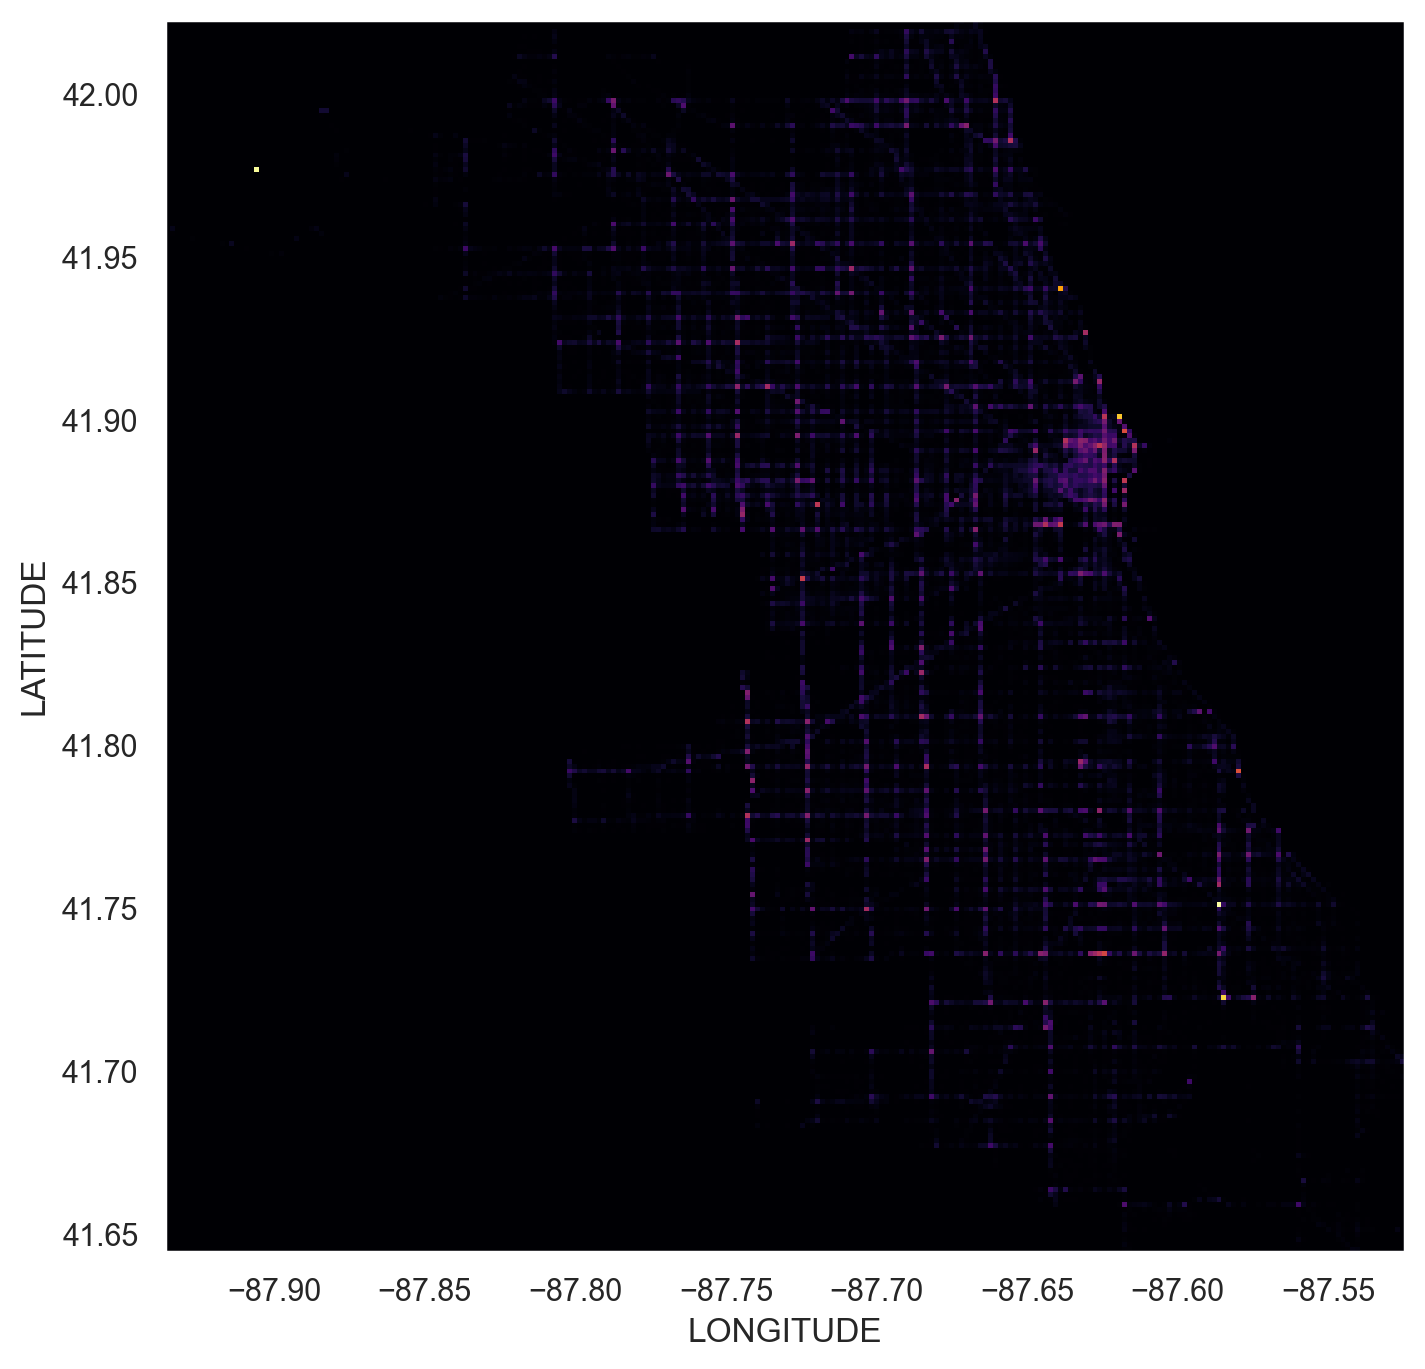

In [ ]:
# crash heatmap, emphasis on high-frequency locations
plt.figure(figsize=(8, 8), dpi=200)
plt.hist2d(df['LONGITUDE'],
           df['LATITUDE'],
           bins=250,
           cmap='inferno')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
# plt.savefig('exports/crash_heatmap1', dpi=200)
plt.show()

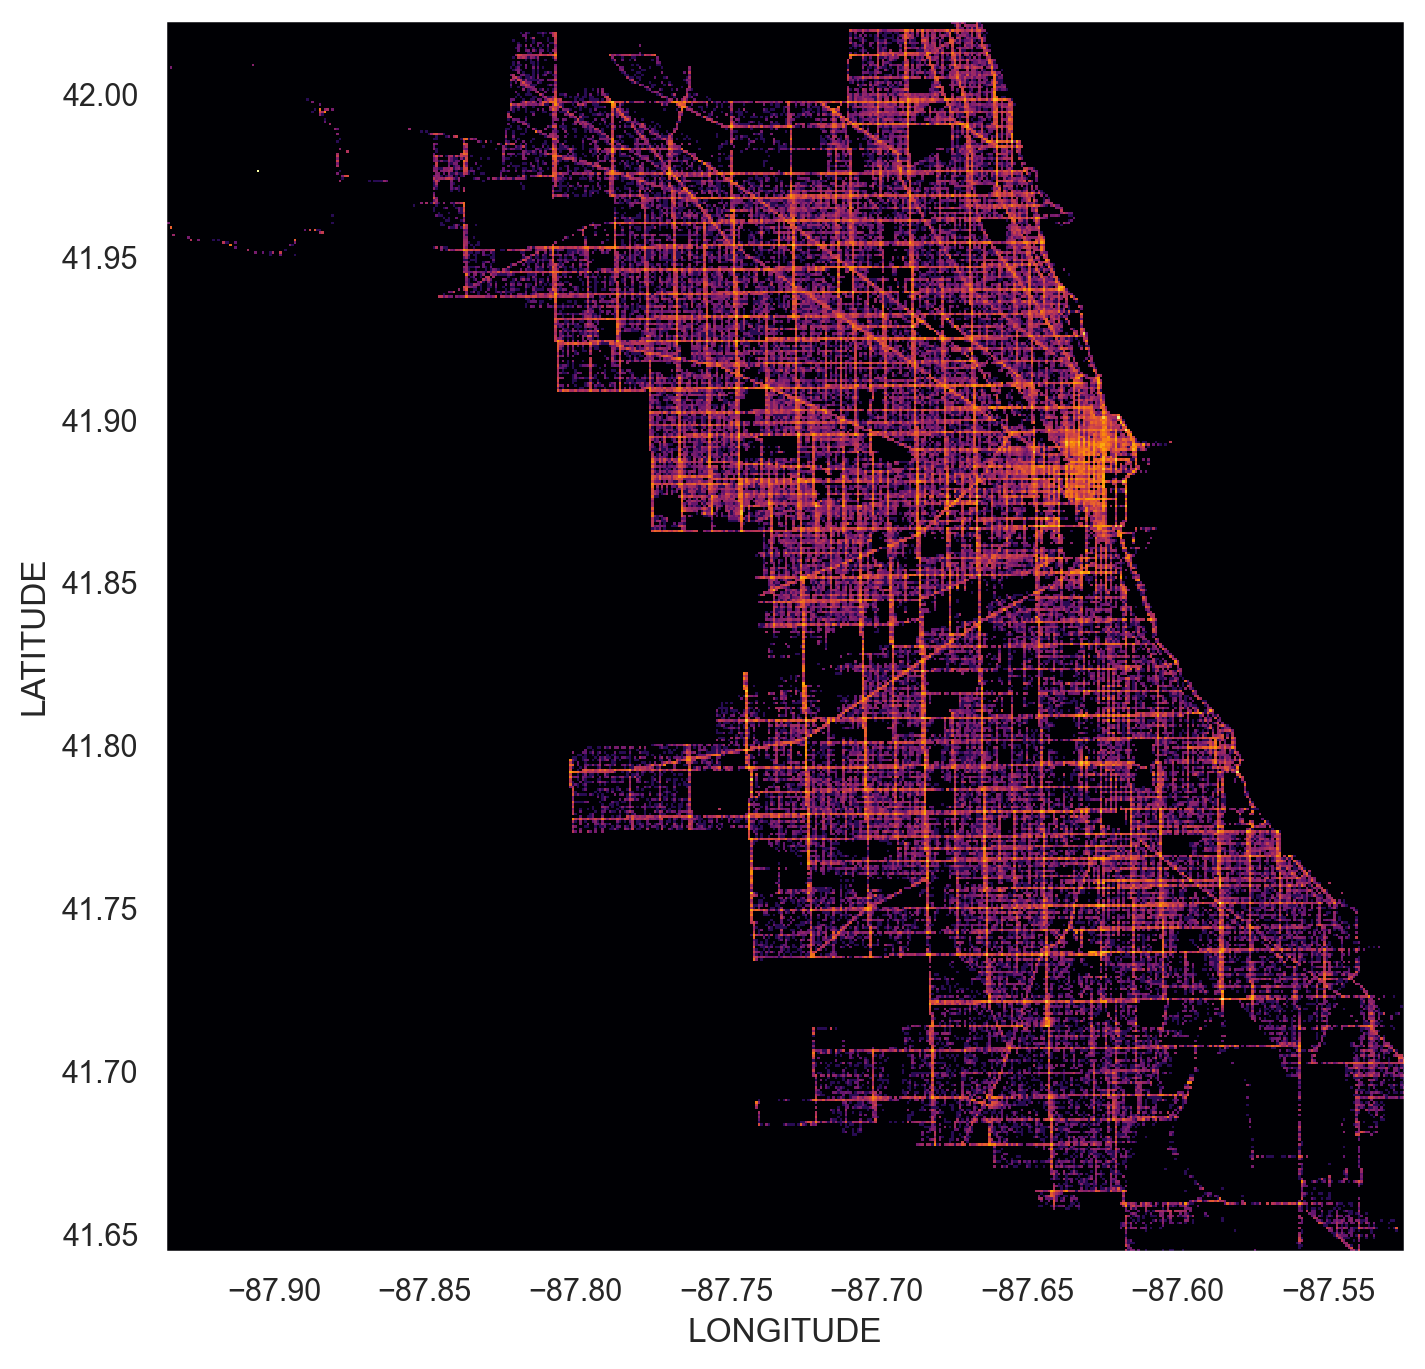

In [ ]:
# crash heatmap, normalized and more granular
plt.figure(figsize=(8, 8), dpi=200)
plt.hist2d(df['LONGITUDE'],
           df['LATITUDE'],
           bins=500,
           norm='symlog',
           cmap='inferno')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
# plt.savefig('exports/crash_heatmap2', dpi=200)
plt.show()

In [371]:
# most frequent locations; many of these appear to not be exact coordinates, instead generalized for stretches of road
# first listed is the generalized location for the O'Hare Airport (far northwest)
df['LOCATION'].value_counts().head()

LOCATION
POINT (-87.905309125103 41.976201139024)    1191
POINT (-87.619928173678 41.900958919109)     711
POINT (-87.585971992965 41.751460603167)     550
POINT (-87.580147768689 41.791420282098)     518
POINT (-87.585275565077 41.722257273006)     425
Name: count, dtype: int64

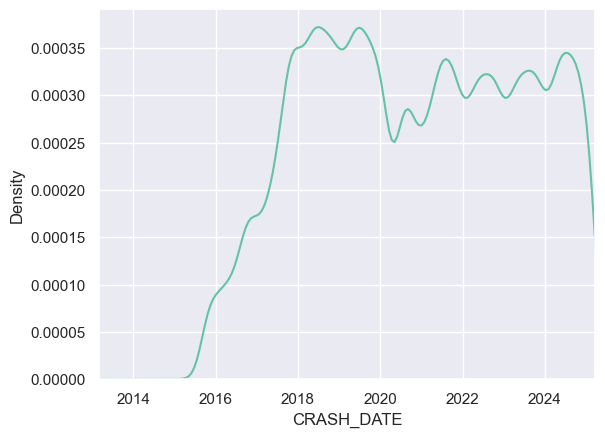

In [372]:
sns.kdeplot(df, x='CRASH_DATE')
plt.xlim(df['CRASH_DATE'].min(), df['CRASH_DATE'].max())
plt.show()

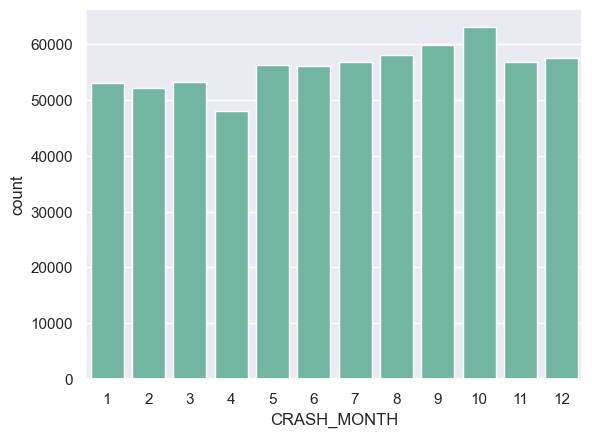

In [373]:
sns.countplot(df, x='CRASH_MONTH')
plt.show()

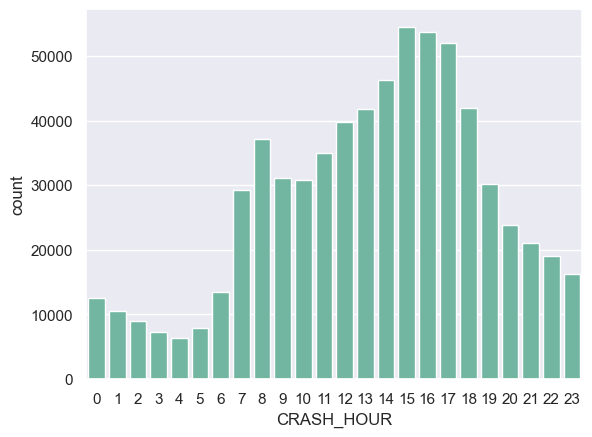

In [374]:
sns.countplot(df, x='CRASH_HOUR')
plt.show()

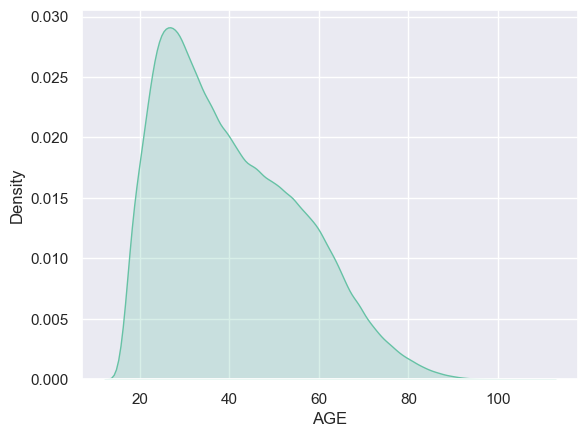

In [375]:
# age dist, pre-aggregating
sns.kdeplot(people_d, x='AGE', fill=True)
plt.show()

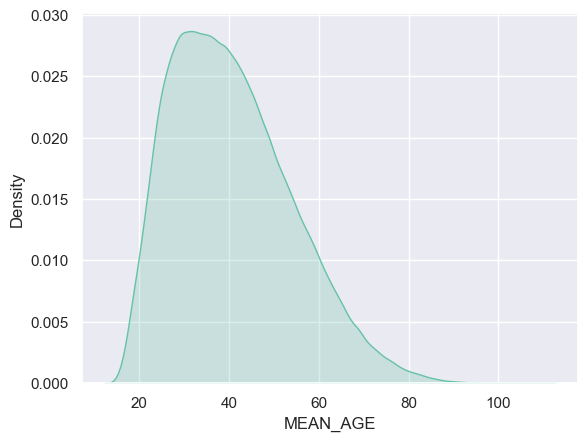

In [376]:
# age dist, mean-aggregated
sns.kdeplot(df, x='MEAN_AGE', fill=True)
plt.show()

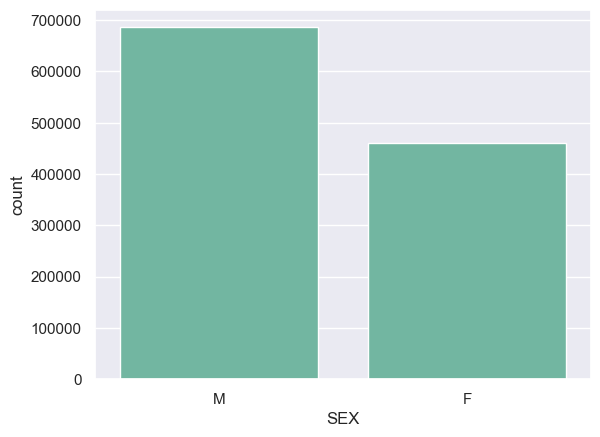

In [377]:
sns.countplot(people_d, x='SEX')
plt.show()

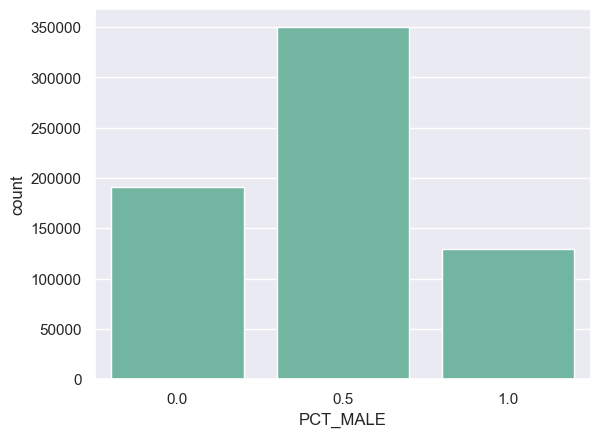

In [378]:
sns.countplot(df, x='PCT_MALE')
plt.show()

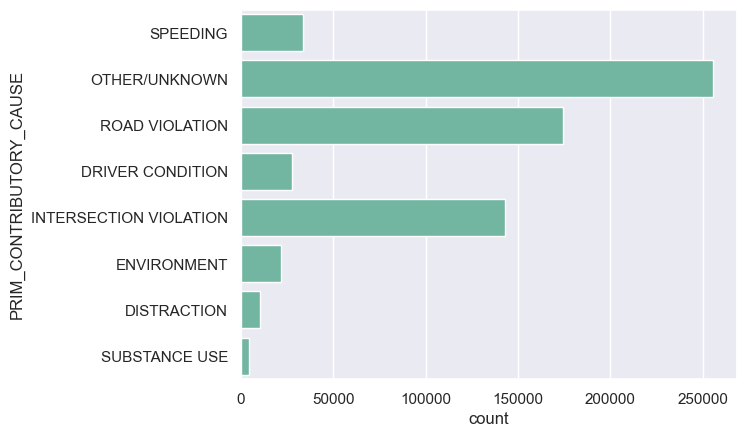

In [379]:
sns.countplot(df, y='PRIM_CONTRIBUTORY_CAUSE')
plt.show()

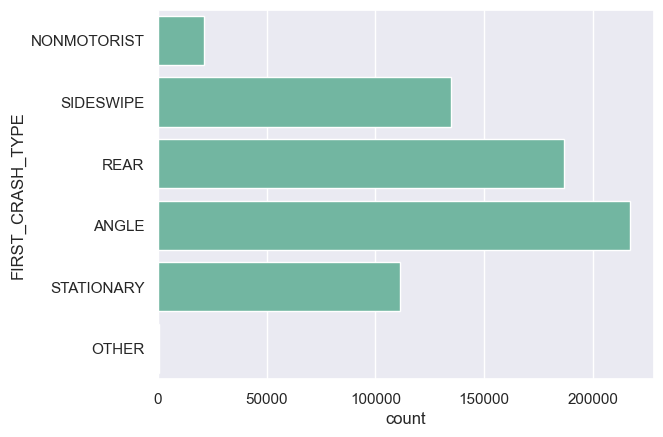

In [380]:
sns.countplot(df, y='FIRST_CRASH_TYPE')
plt.show()

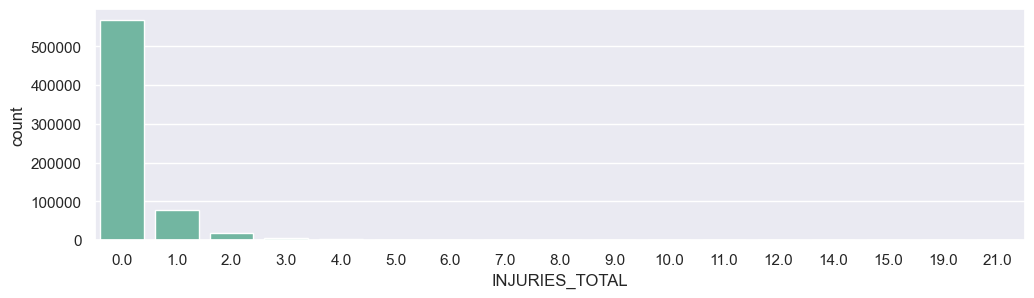

In [381]:
plt.figure(figsize=(12, 3))
sns.countplot(df, x='INJURIES_TOTAL')
plt.show()

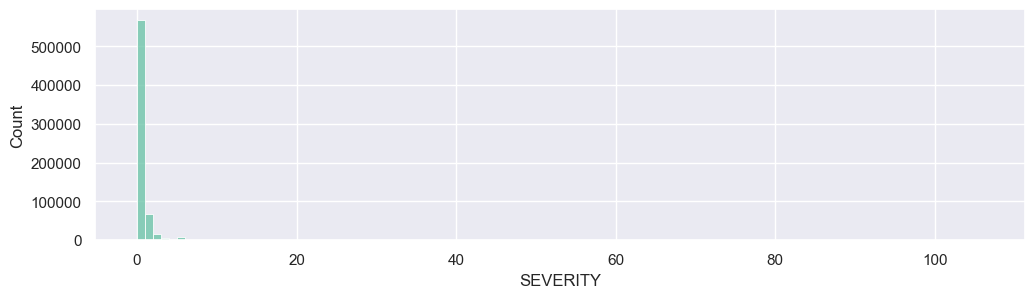

In [382]:
plt.figure(figsize=(12, 3))
sns.histplot(df, x='SEVERITY', binwidth=1)
# plt.xlim(0,100)
plt.show()

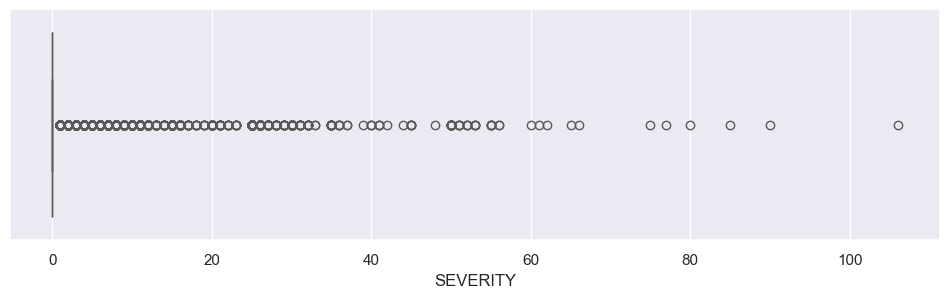

In [383]:
plt.figure(figsize=(12, 3))
sns.boxplot(df, x='SEVERITY')
plt.show()

## ML Analysis

Severity is too skewed to be used as a regression response; utilizing classification instead.

### Logistic Regression

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
random_state = 82

In [385]:
# binary target
df['HAS_INJURY'] = df['INJURIES_TOTAL'] > 0

#### "Has Injury" as Response

In [386]:
df['HAS_INJURY'].value_counts()

HAS_INJURY
False    567666
True     103385
Name: count, dtype: int64

In [387]:
X = df[['POSTED_SPEED_LIMIT', 'CONDITION_QUALITY', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE', 'MEAN_AGE', 'PCT_MALE']]
y = df['HAS_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_cat = ['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']
X_num = X.drop(X_cat, axis=1).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_cat),
    ('num', StandardScaler(), X_num)
])

In [388]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169188   1308]
 [ 25781   5039]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93    170496
        True       0.79      0.16      0.27     30820

    accuracy                           0.87    201316
   macro avg       0.83      0.58      0.60    201316
weighted avg       0.86      0.87      0.83    201316



In [389]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115687  54809]
 [ 11339  19481]]
              precision    recall  f1-score   support

       False       0.91      0.68      0.78    170496
        True       0.26      0.63      0.37     30820

    accuracy                           0.67    201316
   macro avg       0.59      0.66      0.57    201316
weighted avg       0.81      0.67      0.72    201316



#### Crash Type as Response

In [390]:
df['CRASH_TYPE'].value_counts()

CRASH_TYPE
NO INJURY / DRIVE AWAY              477905
INJURY AND / OR TOW DUE TO CRASH    193146
Name: count, dtype: int64

In [391]:
X = df[['POSTED_SPEED_LIMIT', 'CONDITION_QUALITY', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE', 'MEAN_AGE', 'PCT_MALE']]
y = df['CRASH_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_cat = ['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']
X_num = X.drop(X_cat, axis=1).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_cat),
    ('num', StandardScaler(), X_num)
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 13565  44163]
 [  6892 136696]]
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.66      0.23      0.35     57728
          NO INJURY / DRIVE AWAY       0.76      0.95      0.84    143588

                        accuracy                           0.75    201316
                       macro avg       0.71      0.59      0.59    201316
                    weighted avg       0.73      0.75      0.70    201316



In [392]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40344 17384]
 [49695 93893]]
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.45      0.70      0.55     57728
          NO INJURY / DRIVE AWAY       0.84      0.65      0.74    143588

                        accuracy                           0.67    201316
                       macro avg       0.65      0.68      0.64    201316
                    weighted avg       0.73      0.67      0.68    201316



### Tree Models

In [393]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Decison Tree

In [394]:
X = df[['POSTED_SPEED_LIMIT', 'CONDITION_QUALITY', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE', 'MEAN_AGE', 'PCT_MALE']]
y = df['HAS_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_cat = ['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']
X_num = X.drop(X_cat, axis=1).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_cat),
    ('num', 'passthrough', X_num)
])

In [395]:
# balanced class weight
tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=random_state, class_weight='balanced'))
])

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117103  53393]
 [ 13656  17164]]
              precision    recall  f1-score   support

       False       0.90      0.69      0.78    170496
        True       0.24      0.56      0.34     30820

    accuracy                           0.67    201316
   macro avg       0.57      0.62      0.56    201316
weighted avg       0.80      0.67      0.71    201316



#### Random Forest

In [396]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=random_state))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[165974   4522]
 [ 25249   5571]]
              precision    recall  f1-score   support

       False       0.87      0.97      0.92    170496
        True       0.55      0.18      0.27     30820

    accuracy                           0.85    201316
   macro avg       0.71      0.58      0.60    201316
weighted avg       0.82      0.85      0.82    201316



In [397]:
# balanced class weight
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=random_state, class_weight='balanced'))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[126089  44407]
 [ 15124  15696]]
              precision    recall  f1-score   support

       False       0.89      0.74      0.81    170496
        True       0.26      0.51      0.35     30820

    accuracy                           0.70    201316
   macro avg       0.58      0.62      0.58    201316
weighted avg       0.80      0.70      0.74    201316



#### Gradient Boosted Tree

In [398]:
gb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state))
])

gb_pipeline.fit(X_train, y_train)

y_pred = gb_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169209   1287]
 [ 25785   5035]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93    170496
        True       0.80      0.16      0.27     30820

    accuracy                           0.87    201316
   macro avg       0.83      0.58      0.60    201316
weighted avg       0.86      0.87      0.83    201316



In [399]:
# threshold tuning (class imbalance)
y_probs = gb_pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169209   1287]
 [ 25785   5035]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93    170496
        True       0.80      0.16      0.27     30820

    accuracy                           0.87    201316
   macro avg       0.83      0.58      0.60    201316
weighted avg       0.86      0.87      0.83    201316



### Neural Network

In [400]:
from sklearn.neural_network import MLPClassifier

In [401]:
X = df[['POSTED_SPEED_LIMIT', 'CONDITION_QUALITY', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE', 'MEAN_AGE', 'PCT_MALE']]
y = df['HAS_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_cat = ['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']
X_num = X.drop(X_cat, axis=1).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_cat),
    ('num', StandardScaler(), X_num)
])

In [402]:
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # 1 hidden layer
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])

nn_pipeline.fit(X_train, y_train)

y_pred = nn_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169186   1310]
 [ 25756   5064]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93    170496
        True       0.79      0.16      0.27     30820

    accuracy                           0.87    201316
   macro avg       0.83      0.58      0.60    201316
weighted avg       0.86      0.87      0.83    201316



In [403]:
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # 2 hidden layers
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42))
])

nn_pipeline.fit(X_train, y_train)

y_pred = nn_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169165   1331]
 [ 25729   5091]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93    170496
        True       0.79      0.17      0.27     30820

    accuracy                           0.87    201316
   macro avg       0.83      0.58      0.60    201316
weighted avg       0.86      0.87      0.83    201316



In [404]:
# crash type as response
X = df[['POSTED_SPEED_LIMIT', 'CONDITION_QUALITY', 'PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE', 'MEAN_AGE', 'PCT_MALE']]
y = df['CRASH_TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

X_cat = ['PRIM_CONTRIBUTORY_CAUSE', 'FIRST_CRASH_TYPE']
X_num = X.drop(X_cat, axis=1).columns

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_cat),
    ('num', StandardScaler(), X_num)
])

nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])

nn_pipeline.fit(X_train, y_train)

y_pred = nn_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 17274  40454]
 [  9113 134475]]
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.65      0.30      0.41     57728
          NO INJURY / DRIVE AWAY       0.77      0.94      0.84    143588

                        accuracy                           0.75    201316
                       macro avg       0.71      0.62      0.63    201316
                    weighted avg       0.74      0.75      0.72    201316



## Conclusion

**Reflections**
- Dataset somewhat flawed/limited
  - Significant number of nulls in certain columns, making potentially useful info virtually inapplicable
  - Other info that would have been very useful not included at all (e.g. which driver was responsible for a crash, continuous dollar amounts for damage)
  - Limited to one city; similar data from other parts of U.S. may provide more robust results
- May have benefitted from linked datasets
  - Baseline traffic patterns, demographics, etc. (i.e. comparing normal driver/vehicle characteristics to those in crashes)
  - Weather data (at times/locations of crashes)
  - Data about specific vehicle models (e.g. weight)
- With more time, would have liked to explore deeper
  - Spatial analysis, identifying characteristics of roads
  - Handle nulls differently, possibly apply ML model for filling
